In [1084]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from ipywidgets import interact

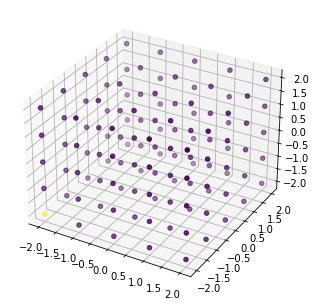

In [1085]:
(X,Y,Z) = np.mgrid[-2:3, -2:3, -2:3]
col = np.zeros([5,5,5])
col[0,0,0]=1
# col = np.random.rand(20,20,20)

fig = plt.figure(1)
fig.clf()
ax = Axes3D(fig)

ax.scatter(X,Y,Z, c=col)

plt.draw()

plt.show()

One of the ideas to visualise 3D space comes from this OverStack thread:
https://stackoverflow.com/questions/16072197/python-big-set-of-2d-numpy-arrays-how-to-visualize-in-3d

# 2D Tetris block generator

In [1253]:
def generate_2d_block (mean_n_bricks, st_dev = 3):
    # Initiate the tetris block generator
    area = np.zeros((11, 11))
    options = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    bricks = [[5,5]]
    
    # Decide how many bricks in a block
    n_bricks = np.random.normal(mean_n_bricks, st_dev, 1).round()

    # Rnadomly add bricks
    while len(bricks) < n_bricks:
        step = np.array(random.choice(options))
        starting_brick = np.array(random.choice(bricks))
        new_brick = starting_brick + step
        if list(new_brick) not in bricks:
            bricks.append(list(new_brick))

    # Visualise the block generated
    for (x, y) in bricks:
        area[x, y] = 1
        
    plt.imshow(area)
    
    return bricks

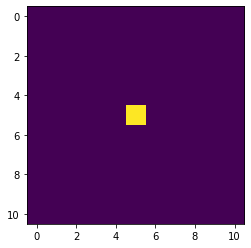

In [1304]:
a = generate_2d_block (5)

# Random positioning on a larger area

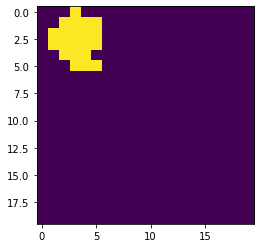

In [1341]:
# Prepare the area for bricklaying 
d0 = 20

def lay_the_2d_block (mean_n_bricks, st_dev):
    
    area = np.zeros((d0, d0))
    bricks = np.array(generate_2d_block(mean_n_bricks, st_dev))
    instructions = np.array(bricks[:] - bricks[0])
    start = np.array([[random.randint(0, d0), random.randint(0, d0)]])
    
    # If the brick coordinates are within the area of interest, lay them down
    for (x, y) in start + instructions: 
        if (x in range(0, d0)) & (y in range(0, d0)):
            area[x, y] = 1
            
    plt.imshow(area)

lay_the_2d_block(10, 5)

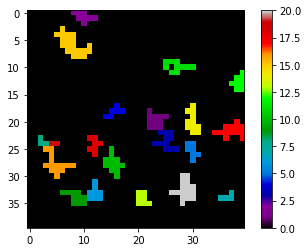

In [1368]:
def some_2d_blocks (n_blocks, d0, mean_n_bricks, st_dev):
    
    area = np.zeros((d0, d0))
    density = []
    blocks_in_the_area = 0
    
    while blocks_in_the_area < n_blocks:
        
        # Randomly generate a block and pick a starting point for laying it
        bricks = np.array(generate_2d_block(mean_n_bricks, st_dev))
        instructions = np.array(bricks[:] - bricks[0])
        start = np.array([[random.randint(0, d0), random.randint(0, d0)]])
        
        # Check for overlap with existing blocks
        if any([x, y] in density for (x, y) in start + instructions):
            continue
        
        # If there's no overlap, lay the block (only the bricks within the area of interest)
        blocks_in_the_area +=1
        
        for (x,y) in start + instructions:
            if (x in range(0, d0)) & (y in range(0, d0)):
                area[x, y] = blocks_in_the_area
                density.append([x,y])
                
    plt.imshow(area, cmap="nipy_spectral")
    plt.colorbar()

some_2d_blocks(20, 40, 10, 5)

# 3D Tetris block generator

In [1371]:
def generate_3d_block (n_bricks, mean_n_bricks, st_dev):
    # Initiate the tetris block generator
    options = np.array([[-1, 0, 0], [1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, -1], [0, 0, 1]])
    bricks = np.array([[0, 0, 0]], np.newaxis)
    
    # Decide how many bricks in a block
    n_bricks = np.random.normal(mean_n_bricks, st_dev, 1).round()
    
    # Rnadomly add bricks
    while len(bricks) < n_bricks:
        
        step = random.choice(options)
        starting_block = random.choice(bricks)
        
        if (starting_block + step).tolist() not in bricks.tolist():
            bricks = np.vstack([bricks, starting_block + step])
            
    return bricks

a = generate_3d_block (10, 10, 5)

In [1376]:
def visualise_single_3d_block (n_bricks, mean_n_bricks, st_dev, d0=20):
    area = np.zeros((d0, d0, d0))
    instructions = generate_3d_block(n_bricks, mean_n_bricks, st_dev)
    start = np.array([[random.randint(1, d0), random.randint(1, d0), random.randint(1, d0)]])
    for (x, y, z) in (start + instructions): 
        if all(coord in range (0, d0) for coord in [x, y, z]):
            area[x, y, z] = 1
    interact(lambda z: plt.imshow(area[z]), z=(0,19))

visualise_single_3d_block (10, 10, 5, d0=20)


interactive(children=(IntSlider(value=9, description='z', max=19), Output()), _dom_classes=('widget-interact',…

### Random positioning inside the larger volume

In [1407]:
d0 = 20
n_blocks = 30

def visualise_more_3d_blocks (mean_n_bricks, st_dev, n_blocks = n_blocks, d0=d0):
    
    area = np.zeros((d0, d0, d0))
    density = []
    blocks_in_the_area = 1
    
    while blocks_in_the_area < n_blocks:
        instructions = generate_3d_block(10, mean_n_bricks, st_dev)
        start = np.array([[random.randint(0, d0), random.randint(0, d0), random.randint(0, d0)]])
        
        if any([x, y, z] in density for [x, y, z] in (start+instructions)):
            continue
            
        for (x, y, z) in (start + instructions): 
            if all(coord in range (0, d0) for coord in [x, y, z]):
                area[x, y, z] = blocks_in_the_area
                density.append([x, y, z])
               
        blocks_in_the_area +=1
        
    interact(lambda z: (
        plt.pcolor(area[z], vmin=0, vmax=n_blocks, cmap="nipy_spectral"), 
        plt.colorbar()), z=(0, 19))
    plt.show()
    
visualise_more_3d_blocks(10, 5, n_blocks = n_blocks, d0 = d0)

interactive(children=(IntSlider(value=9, description='z', max=19), Output()), _dom_classes=('widget-interact',…

In [1182]:
np.random.normal(10, 5, (1000)).round()

9.961

In [1149]:
i, j = math.floor(21/5)-1, 21 % 5 - 1
print (i, j)

3 0


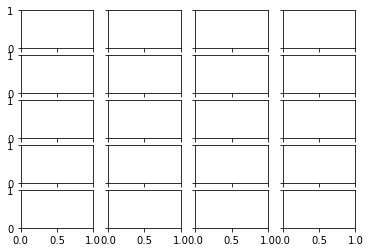

interactive(children=(IntSlider(value=9, description='z', max=19), Output()), _dom_classes=('widget-interact',…

[[[ 0.  0.  0. ... 14.  0.  0.]
  [ 0.  0.  0. ... 14.  0.  0.]
  [ 0.  0.  0. ... 14. 14. 14.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 ...

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  

In [1121]:
# Plot cross-sections in the z-stack
fig, axes = plt.subplots(5, 4, sharex=True, sharey=True)
area = visualise_more_3d_blocks (20, 20)
print(area)
for i in range (5):
    for j in range (4):
        axes[i, j].imshow(area[(4*i)+j])